In [1]:
# imports
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# machine learning models import
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [3]:
# model evauation metrics import
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Data Exploration

In [4]:
# read the csv file into dataframe
df = pd.read_csv("dataset.csv")
df.head()

,LINKID,DOCUMENTDATE,EXPIRYDATE,INSUREDNATURE,DATEOFBIRTH,SEX,MARITALSTATUS,OCCUPATION,BRANCHCODE,DISTRINCTCODE,...,MAINCLASS,DESCRIPTION,SUBCLASS,SUMINSURED,ANNUALBASICPREMIUM,ANNUALSRCCPREMIUM,ANNUALTCPREMIUM,ANNUALPREMIUMTOTAL,CLAIMAMOUNT,REGISTRARIONID
0,POLE201413191644,2014-10-14 00:00:00,2015-07-20,C,NaN,NaN,NaN,NaN,KUR,KUR,...,VCFL,VEHICLE COMMERCIAL VEHICLE FLEET,JCH2,9450000.0,1357.18,1130.99,0.0,2488.17,811459.88,16702
1,POLE201514230042,2015-06-29 00:00:00,2016-03-30,C,NaN,NaN,NaN,NaN,CNR,CNR,...,VCFP,VEHICLE PRIVATE CAR FLEET,JPC,149856000.0,1411.00,0.00,0.0,1411.00,50727.34,28602
2,POLE201412564131,2014-06-06 00:00:00,2015-02-04,C,NaN,NaN,NaN,NaN,JIC,JIC,...,VCFP,VEHICLE PRIVATE CAR FLEET,JPC,480436325.0,6142.68,0.00,0.0,6142.68,NaN,31010
3,POLE20095627214,2009-03-31 00:00:00,2010-02-04,C,NaN,NaN,NaN,NaN,JIC,JIC,...,VCFP,VEHICLE PRIVATE CAR FLEET,JPC,378102975.0,22763.34,0.00,0.0,22763.34,NaN,36045
4,POLE20084893573,2008-07-01 00:00:00,2009-02-04,C,NaN,NaN,NaN,NaN,JIC,JIC,...,VCFP,VEHICLE PRIVATE CAR FLEET,JPC,335065400.0,556.23,0.00,0.0,556.23,27700.00,34832


In [5]:
# df
print('df rows: ', df.shape[0])
print('df cols: ', df.shape[1])

df rows:  252425
df cols:  36


In [6]:
# dataframe describe function
def dataframe_describe(df):
    df_desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Min Value', 'Max Value', 'Catagories', 'Null Values'])
    for col in df.columns:
        dtype = df[col].dtype
        min_value = df[col].min() if np.issubdtype(dtype, np.number) else None
        max_value = df[col].max() if np.issubdtype(dtype, np.number) else None
        categories = df[col].nunique() if dtype == 'object' else None
        null_values = df[col].isnull().sum()
        df_desc.loc[len(df_desc)] = [col, dtype, min_value, max_value, categories, null_values]
    return df_desc

In [7]:
# describe df
dataframe_describe(df)

,Column Name,Data Type,Min Value,Max Value,Catagories,Null Values
0,LINKID,object,NaN,NaN,38308,0
1,DOCUMENTDATE,object,NaN,NaN,3626,0
2,EXPIRYDATE,object,NaN,NaN,3908,0
3,INSUREDNATURE,object,NaN,NaN,2,0
4,DATEOFBIRTH,object,NaN,NaN,1119,248641
5,SEX,object,NaN,NaN,2,173317
6,MARITALSTATUS,object,NaN,NaN,9,232371
7,OCCUPATION,object,NaN,NaN,123,249613
8,BRANCHCODE,object,NaN,NaN,205,0
9,DISTRINCTCODE,object,NaN,NaN,95,0


## Data Pre Processing

In [8]:
# removing columns with lot of null values
unimportant_cols = ['LINKID', 'REGISTRARIONID', 'DATEOFBIRTH', 'OCCUPATION', 'REGISTRATIONDATE', 'NONROADUSE', 'SOCIALUSE', 'COMMERCIALUSE', 'EQUIPMENTVALUE']
df = df.drop(unimportant_cols, axis=1)

#### 1. Data Pre Processing by Insurance Customer

In [9]:
# insured nature catogories
print('Insured nature catogories : ', df['INSUREDNATURE'].unique())

Insured nature catogories :  ['C' 'I']


In [10]:
# divide df based on insured nature
df_i = df.loc[df['INSUREDNATURE'] == 'I']
df_c = df.loc[df['INSUREDNATURE'] == 'C']
print('df_i rows: ', df_i.shape[0])
print('df_c rows: ', df_c.shape[0])

df_i rows:  80196
df_c rows:  172229


In [11]:
# describe df_i
dataframe_describe(df_i[['SEX', 'MARITALSTATUS']])

,Column Name,Data Type,Min Value,Max Value,Catagories,Null Values
0,SEX,object,None,None,2,1228
1,MARITALSTATUS,object,None,None,9,60207


In [12]:
# replace null values in date of birth, sex & marital status columns with 'Unknown' in df_i
df_i['SEX'].fillna('Unknown', inplace=True)
df_i['MARITALSTATUS'].fillna('N', inplace=True)

C:\Users\Ruchira Dias\AppData\Local\Temp\ipykernel_5012\2423778699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['SEX'].fillna('Unknown', inplace=True)
C:\Users\Ruchira Dias\AppData\Local\Temp\ipykernel_5012\2423778699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['MARITALSTATUS'].fillna('N', inplace=True)


In [13]:
# marital status catogories
print('Marital status catogories: ', df_i['MARITALSTATUS'].unique())

Marital status catogories:  ['N' 'M' 'W' 'S' 'A' '8' 'D' '`' 'V']


In [14]:
# replace null and '`' values in marital status column with 'Unknown' in df_i
df_i.loc[df_i['MARITALSTATUS'] == '8', 'MARITALSTATUS'] = 'N'
df_i.loc[df_i['MARITALSTATUS'] == '`', 'MARITALSTATUS'] = 'N'

In [15]:
# describe df_c
dataframe_describe(df_c[['SEX', 'MARITALSTATUS']])

,Column Name,Data Type,Min Value,Max Value,Catagories,Null Values
0,SEX,object,None,None,2,172089
1,MARITALSTATUS,object,None,None,1,172164


In [16]:
# replace all values in date of birth, sex, marital status & occupation columns with 'N/A' in df_c
df_c.loc[df_c['SEX'] != 'N/A', 'SEX'] = 'N/A'
df_c.loc[df_c['MARITALSTATUS'] != 'N/A', 'MARITALSTATUS'] = 'N/A'

In [17]:
# concatenate df_i and df_c to df
df = pd.concat([df_i, df_c])

#### 2. Data Pre Processing by Vehicle

In [18]:
# describe df by vehicle
dataframe_describe(df[['YEAR', 'VEHICLETYPE', 'MAKE', 'MODEL', 'TONNAGE', 'SEATINGCAPACITY', 'FUELTYPE', 'VEHICLEVALUE']])

,Column Name,Data Type,Min Value,Max Value,Catagories,Null Values
0,YEAR,float64,1.0,9701.0,None,6093
1,VEHICLETYPE,object,NaN,NaN,43,22802
2,MAKE,object,NaN,NaN,336,1894
3,MODEL,object,NaN,NaN,2471,1816
4,TONNAGE,float64,0.0,500000.0,None,31872
5,SEATINGCAPACITY,float64,1.0,317.0,None,1370
6,FUELTYPE,object,NaN,NaN,27,1516
7,VEHICLEVALUE,float64,0.0,50000000.0,None,0


In [19]:
# replace null values in columns with 'Unknown'
df['YEAR'].fillna('Unknown', inplace=True)
df['MAKE'].fillna('Unkown', inplace=True)
df['MODEL'].fillna('Unkown', inplace=True)
df['VEHICLETYPE'].fillna('Unkown', inplace=True)
df['TONNAGE'].fillna('Unkown', inplace=True)
df['SEATINGCAPACITY'].fillna('Unkown', inplace=True)
df['FUELTYPE'].fillna('Unkown', inplace=True)

In [20]:
# vehicle type catogories
print('Vehicle type catogories: ', df['VEHICLETYPE'].unique())

Vehicle type catogories:  ['LORRY' 'CAR' 'VAN' 'MOTOR CYCLE' 'THREE WHEELER' 'OTHER' 'SINGLE-CAB'
 'TRAILER' 'Unkown' 'DOUBLE-CAB' 'BUS' 'JEEP' 'TRACTOR' 'OTHERS' 'SCOOTER'
 'HAND TRACTOR' 'TIPPER' 'PRY-MOVER' 'CREW-CAB' 'DUAL PURPOSE'
 'TRADE PLATE' 'MOTOR LORRY' 'DOUBLE CAB' 'M/CYCLE' 'THREEWHEELER'
 'CREW CAB' 'CARAVAN' 'M/LORRY' 'O' 'MOTOR CAR' '.' 'OTHETR'
 'BACKHOE LOADER' 'STATION_WAGON' 'OCAR' 'TRICYCLE VAN' 'M/CAR'
 'DUALPURPOSE' 'D/P VEHICLE' 'INVAID CARRIGE' 'MOTOR TRICYCLE' 'CA'
 'CD DAWN' 'CARAVAN_TRAILER']


In [21]:
# correct values in vehicle type column with correct value
df.loc[df['VEHICLETYPE'] == 'OTHERS', 'VEHICLETYPE'] = 'OTHER'
df.loc[df['VEHICLETYPE'] == 'OTHETR', 'VEHICLETYPE'] = 'OTHER'
df.loc[df['VEHICLETYPE'] == 'O', 'VEHICLETYPE'] = 'OTHER'
df.loc[df['VEHICLETYPE'] == '.', 'VEHICLETYPE'] = 'OTHER'

df.loc[df['VEHICLETYPE'] == 'M/CAR', 'VEHICLETYPE'] = 'CAR'
df.loc[df['VEHICLETYPE'] == 'MOTOR CAR', 'VEHICLETYPE'] = 'CAR'
df.loc[df['VEHICLETYPE'] == 'OCAR', 'VEHICLETYPE'] = 'CAR'
df.loc[df['VEHICLETYPE'] == 'CA', 'VEHICLETYPE'] = 'CAR'

df.loc[df['VEHICLETYPE'] == 'M/CYCLE', 'VEHICLETYPE'] = 'MOTOR CYCLE'
df.loc[df['VEHICLETYPE'] == 'CD DAWN', 'VEHICLETYPE'] = 'SCOOTER'

df.loc[df['VEHICLETYPE'] == 'THREEWHEELER', 'VEHICLETYPE'] = 'THREE WHEELER'

df.loc[df['VEHICLETYPE'] == 'M/LORRY', 'VEHICLETYPE'] = 'LORRY'
df.loc[df['VEHICLETYPE'] == 'MOTOR LORRY', 'VEHICLETYPE'] = 'LORRY'

df.loc[df['VEHICLETYPE'] == 'DUALPURPOSE', 'VEHICLETYPE'] = 'DUAL PURPOSE'
df.loc[df['VEHICLETYPE'] == 'D/P VEHICLE', 'VEHICLETYPE'] = 'DUAL PURPOSE'

df.loc[df['VEHICLETYPE'] == 'PRY-MOVER', 'VEHICLETYPE'] = 'PRY MOVER'
df.loc[df['VEHICLETYPE'] == 'CREW-CAB', 'VEHICLETYPE'] = 'CREW CAB'
df.loc[df['VEHICLETYPE'] == 'SINGLE-CAB', 'VEHICLETYPE'] = 'SINGLE CAB'
df.loc[df['VEHICLETYPE'] == 'DOUBLE-CAB', 'VEHICLETYPE'] = 'DOUBLE CAB'
df.loc[df['VEHICLETYPE'] == 'STATION_WAGON', 'VEHICLETYPE'] = 'STATION WAGON'
df.loc[df['VEHICLETYPE'] == 'CARAVAN_TRAILER', 'VEHICLETYPE'] = 'TRAILER'

In [22]:
# maker catogories
print('Maker catogories: ', sorted(df['MAKE'].unique()))

Maker catogories:  ['.', 'ABL', 'ACTO', 'AEC', 'AEOLUS', 'AESL', 'AGRATI', 'AGRIMEC', 'AGRO', 'AGROTECH', 'AI RACING', 'AIRACING', 'AL RACINO', 'ALBA', 'ALBA.', 'ALFA ROMEO', 'ALTO', 'AMBASSADOR', 'APPRILA', 'ASHOK', 'ASHOK LAYLAND', 'ASHOK LEYLAND', 'ASIA WING', 'ASOK LEYLAND', 'ASOKALEYLAND', 'ATCO', 'AUDI', 'AUSTIN', 'B', 'B.M.W', 'BAJAJ', 'BAJAJ BOXER', 'BALAJ', 'BEIJING', 'BENDZ', 'BMC', 'BMW', 'BORELANDS', 'BRILLIANCE SHINERAY', 'BYD', 'CADILAC', 'CAL', 'CASE', 'CATERPILAR', 'CATERPILLAR', 'CENFIN', 'CEYGRA', 'CHANA', 'CHANGAN', 'CHERRY', 'CHERY', 'CHEVROLET', 'CHRYSLER', 'CIC', 'CIMC SINOTRUK', 'CITROEN', 'DAEWOO', 'DAF', 'DAIDO', 'DAIHATSU', 'DAIMLER', 'DATSUN', 'DAVE', 'DAYANG', 'DEMAK', 'DEMARK', 'DFSK', 'DIAHATSU', 'DILAN', 'DONG FENG', 'DONGFENG', 'DONGFENO', 'DOOSAN', 'DUTCH LANAKA', 'DUTCH LANKA', 'DUTCH LANKA TRA', 'DUTCHLANKA', 'DYNAMIC', 'E R F', 'ECONO', 'EDGRO', 'EICHER', 'ELCHER', 'ELECTRA', 'EMPEROR', 'ERF', 'ESCORT', 'ESCORTS', 'FAMAS', 'FARM MASTER', 'FARM WELL',

In [23]:
# correct values in make column with correct value
df.loc[df['MAKE'] == 'OTHERS', 'MAKE'] = 'OTHER'

df.loc[df['MAKE'] == 'BAJAJ BOXER', 'MAKE'] = 'BAJAJ'
df.loc[df['MAKE'] == 'BALAJ', 'MAKE'] = 'BOXER'

df.loc[df['MAKE'] == 'BENDZ', 'MODEL'] = 'OTHER'
df.loc[df['MAKE'] == 'BENDZ', 'MAKE'] = 'BENZ'

df.loc[df['MAKE'] == 'B.M.W', 'MAKE'] = 'BMW'

df.loc[df['MAKE'] == 'DUTCH LANAKA', 'MAKE'] = 'DUTCH LANKA'
df.loc[df['MAKE'] == 'DUTCH LANKA TRA', 'MAKE'] = 'DUTCH LANKA'
df.loc[df['MAKE'] == 'DUTCHLANKA', 'MAKE'] = 'DUTCH LANKA'

df.loc[df['MAKE'] == 'I.M.T.', 'MAKE'] = 'IMT'

df.loc[df['MAKE'] == 'ISSUZU', 'MAKE'] = 'ISUZU'
df.loc[df['MAKE'] == 'ISUZU TRUCK', 'MAKE'] = 'ISUZU'

df.loc[df['MAKE'] == 'J C B', 'MAKE'] = 'JCB'
df.loc[df['MAKE'] == 'J.C.B', 'MAKE'] = 'JCB'
df.loc[df['MAKE'] == 'J.C.B.', 'MAKE'] = 'JCB'
df.loc[df['MAKE'] == 'JCB3CX-4 BACKHO', 'MAKE'] = 'JCB'

df.loc[df['MAKE'] == 'J M C', 'MAKE'] = 'JMC'

df.loc[df['MAKE'] == 'LANAKA ASHOK', 'MAKE'] = 'LANKA ASHOK LEYLAND'
df.loc[df['MAKE'] == 'LANKA', 'MAKE'] = 'LANKA ASHOK LEYLAND'
df.loc[df['MAKE'] == 'LANKA ASHOK', 'MAKE'] = 'LANKA ASHOK LEYLAND'
df.loc[df['MAKE'] == 'LANKA ASHOK ELY', 'MAKE'] = 'LANKA ASHOK LEYLAND'
df.loc[df['MAKE'] == 'LANKA ASHOK LAY', 'MAKE'] = 'LANKA ASHOK LEYLAND'
df.loc[df['MAKE'] == 'LANKA ASHOK LED', 'MAKE'] = 'LANKA ASHOK LEYLAND'
df.loc[df['MAKE'] == 'LANKA ASHOK LEY', 'MAKE'] = 'LANKA ASHOK LEYLAND'

df.loc[df['MAKE'] == 'ASHOK', 'MAKE'] = 'ASHOK LEYLAND'
df.loc[df['MAKE'] == 'ASHOK LAYLAND', 'MAKE'] = 'ASHOK LEYLAND'
df.loc[df['MAKE'] == 'ASOK LEYLAND', 'MAKE'] = 'ASHOK LEYLAND'
df.loc[df['MAKE'] == 'ASOKALEYLAND', 'MAKE'] = 'ASHOK LEYLAND'

df.loc[df['MAKE'] == 'MARUTU', 'MAKE'] = 'MARUTI'

df.loc[df['MAKE'] == 'PIAGGIO-APE', 'MAKE'] = 'PIAGGIO'

df.loc[df['MAKE'] == 'SKY-LINE', 'MAKE'] = 'SKY LINE'

df.loc[df['MAKE'] == 'TOYOTA ALLION', 'MAKE'] = 'TOYOTA'
df.loc[df['MAKE'] == 'TOYOTA COROLLA', 'MAKE'] = 'TOYOTA'
df.loc[df['MAKE'] == 'TOYOTA YARIS', 'MAKE'] = 'TOYOTA'
df.loc[df['MAKE'] == 'TOYOYA', 'MAKE'] = 'TOYOTA'
df.loc[df['MAKE'] == 'Toyota Corolla ', 'MAKE'] = 'TOYOTA'

df.loc[df['MAKE'] == 'TRADE', 'MAKE'] = 'TRADE PLATE'
df.loc[df['MAKE'] == 'TRAE PLATE', 'MAKE'] = 'TRADE PLATE'
df.loc[df['MAKE'] == 'TRADE PLATE', 'MODEL'] = 'TRADE PLATE'
df.loc[df['MAKE'] == 'TRADE PLATE', 'VEHICLETYPE'] = 'TRADE PLATE'

df.loc[df['MAKE'] == 'TAILOR', 'VEHICLETYPE'] = 'OTHER'

df.loc[df['MAKE'] == 'TRAILER (EM/TP)', 'MAKE'] = 'TRAILER'
df.loc[df['MAKE'] == 'Trailer        ', 'MODEL'] = 'TRAILER'
df.loc[df['MAKE'] == 'Trailer        ', 'VEHICLETYPE'] = 'TRAILER'
df.loc[df['MAKE'] == 'Trailer        ', 'MAKE'] = 'TRAILER'

In [24]:
# replace others values in model column with 'OTHER'
df.loc[df['MODEL'] == 'OTHERS', 'MODEL'] = 'OTHER'

In [25]:
# fuel type catogories
print('Fuel type catogories: ', df['FUELTYPE'].unique())

Fuel type catogories:  ['DIESEL' 'PETROL' 'HYB_PETROL' 'Unkown' 'ELECTRIC' 'P' 'PE' '.'
 'HYB_DIESEL' 'PETORL' 'DESEL' ' PETROL' 'DES' 'PETROL/GAS' 'GAS'
 'NOT STATED' 'DE' '-' '1PETROL' '1998' 'PETRAL' 'TPETROL' 'NOT STARTED'
 '2' '.PETROL' '..' 'PRYTOL' '246700']


In [26]:
# correct values in fuel type column with correct value
df.loc[df['FUELTYPE'] == '.', 'FUELTYPE'] = 'Unkown'
df.loc[df['FUELTYPE'] == '-', 'FUELTYPE'] = 'Unkown'
df.loc[df['FUELTYPE'] == '..', 'FUELTYPE'] = 'Unkown'
df.loc[df['FUELTYPE'] == '2', 'FUELTYPE'] = 'Unkown'
df.loc[df['FUELTYPE'] == '1998', 'FUELTYPE'] = 'Unkown'
df.loc[df['FUELTYPE'] == '246700', 'FUELTYPE'] = 'Unkown'
df.loc[df['FUELTYPE'] == 'NOT STATED', 'FUELTYPE'] = 'Unkown'
df.loc[df['FUELTYPE'] == 'NOT STARTED', 'FUELTYPE'] = 'Unkown'

df.loc[df['FUELTYPE'] == 'P', 'FUELTYPE'] = 'PETROL'
df.loc[df['FUELTYPE'] == 'PE', 'FUELTYPE'] = 'PETROL'
df.loc[df['FUELTYPE'] == 'PETORL', 'FUELTYPE'] = 'PETROL'
df.loc[df['FUELTYPE'] == ' PETROL', 'FUELTYPE'] = 'PETROL'
df.loc[df['FUELTYPE'] == '1PETROL', 'FUELTYPE'] = 'PETROL'
df.loc[df['FUELTYPE'] == 'PETRAL', 'FUELTYPE'] = 'PETROL'
df.loc[df['FUELTYPE'] == 'TPETROL', 'FUELTYPE'] = 'PETROL'
df.loc[df['FUELTYPE'] == '.PETROL', 'FUELTYPE'] = 'PETROL'
df.loc[df['FUELTYPE'] == 'PRYTOL', 'FUELTYPE'] = 'PETROL'

df.loc[df['FUELTYPE'] == 'DESEL', 'FUELTYPE'] = 'DIESEL'
df.loc[df['FUELTYPE'] == 'DES', 'FUELTYPE'] = 'DIESEL'
df.loc[df['FUELTYPE'] == 'DE', 'FUELTYPE'] = 'DIESEL'

## Feature Engineering

In [27]:
# add policy effective days column to df
df['DOCUMENTDATE'] = pd.to_datetime(df['DOCUMENTDATE'])
df['EXPIRYDATE'] = pd.to_datetime(df['EXPIRYDATE'])
df['EFFECTIVEDAYS'] = (df['EXPIRYDATE'] - df['DOCUMENTDATE']).dt.days
df = df[df['EFFECTIVEDAYS'] > 0]

In [28]:
# add risk score column to df
df['RISKSCORE'] = (df['CLAIMAMOUNT'] / df['ANNUALPREMIUMTOTAL'])
df['RISKSCORE'].fillna(0, inplace=True)
df['RISKSCORE'] = df['RISKSCORE'].replace(np.inf, 0)

In [29]:
df = df[['INSUREDNATURE', 'SEX', 'MARITALSTATUS', 'BRANCHCODE', 'DISTRINCTCODE', 'PROVINCECODE', 'ZONECODE',
    'YEAR', 'VEHICLETYPE', 'MAKE', 'MODEL', 'TONNAGE', 'SEATINGCAPACITY', 'FUELTYPE', 'VEHICLEVALUE',
    'MAINCLASS', 'SUBCLASS', 'EFFECTIVEDAYS', 'SUMINSURED',
    'ANNUALBASICPREMIUM', 'ANNUALSRCCPREMIUM', 'ANNUALTCPREMIUM', 'ANNUALPREMIUMTOTAL', 'RISKSCORE']]

In [30]:
# convert columns to string
df['YEAR'] = df['YEAR'].astype(str)
df['TONNAGE'] = df['TONNAGE'].astype(str)
df['SEATINGCAPACITY'] = df['SEATINGCAPACITY'].astype(str)

In [31]:
# saving pre processed and feature enginered dataset 
df.to_csv('new_dataset.csv', index=False)

In [32]:
# encoding the categorical columns
le1 = LabelEncoder()
df['INSUREDNATURE_encoded'] = le1.fit_transform(df['INSUREDNATURE'])
le2 = LabelEncoder()
df['SEX_encoded'] = le2.fit_transform(df['SEX'])
le3 = LabelEncoder()
df['MARITALSTATUS_encoded'] = le3.fit_transform(df['MARITALSTATUS'])
le4 = LabelEncoder()
df['BRANCHCODE_encoded'] = le4.fit_transform(df['BRANCHCODE'])
le5 = LabelEncoder()
df['DISTRINCTCODE_encoded'] = le5.fit_transform(df['DISTRINCTCODE'])
le6 = LabelEncoder()
df['PROVINCECODE_encoded'] = le6.fit_transform(df['PROVINCECODE'])
le7 = LabelEncoder()
df['ZONECODE_encoded'] = le7.fit_transform(df['ZONECODE'])
le8 = LabelEncoder()
df['YEAR_encoded'] = le8.fit_transform(df['YEAR'])
le9 = LabelEncoder()
df['VEHICLETYPE_encoded'] = le9.fit_transform(df['VEHICLETYPE'])
le10 = LabelEncoder()
df['MAKE_encoded'] = le10.fit_transform(df['MAKE'])
le11 = LabelEncoder()
df['MODEL_encoded'] = le11.fit_transform(df['MODEL'])
le12 = LabelEncoder()
df['TONNAGE_encoded'] = le12.fit_transform(df['TONNAGE'])
le13 = LabelEncoder()
df['SEATINGCAPACITY_encoded'] = le13.fit_transform(df['SEATINGCAPACITY'])
le14 = LabelEncoder()
df['FUELTYPE_encoded'] = le14.fit_transform(df['FUELTYPE'])
le15 = LabelEncoder()
df['MAINCLASS_encoded'] = le15.fit_transform(df['MAINCLASS'])
le16 = LabelEncoder()
df['SUBCLASS_encoded'] = le16.fit_transform(df['SUBCLASS'])

## Model Selection 

In [33]:
# getting df with immportant columns
df = df[['INSUREDNATURE_encoded', 'SEX_encoded', 'MARITALSTATUS_encoded',
    'BRANCHCODE_encoded', 'DISTRINCTCODE_encoded', 'PROVINCECODE_encoded', 'ZONECODE_encoded', 
    'YEAR_encoded', 'VEHICLETYPE_encoded', 'MAKE_encoded', 'MODEL_encoded', 'TONNAGE_encoded', 'SEATINGCAPACITY_encoded', 'FUELTYPE_encoded',
    'MAINCLASS_encoded', 'SUBCLASS_encoded', 'EFFECTIVEDAYS', 'VEHICLEVALUE', 'SUMINSURED', 
    'ANNUALBASICPREMIUM', 'ANNUALSRCCPREMIUM', 'ANNUALTCPREMIUM', 'ANNUALPREMIUMTOTAL', 'RISKSCORE']]

In [34]:
# split data into training and testing data
X = df.drop('RISKSCORE', axis=1)
y = df['RISKSCORE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# machine learning models and params for hyperparameter tuning
models = [
    {
        'name': 'Linear Regression',
        'model': LinearRegression(),
        'params': {}
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [3, 5, None],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, None]
        }
    },
    {
        'name': 'K-Nearest Neighbor',
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
]

In [36]:
# hyperparameter tuning models
hp_models = []
for model_config in models:
    model_name = model_config['name']
    model = model_config['model']
    param_grid = model_config['params']
    
    print(f"Performing hyperparameter tuning for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    hp_models.append({
        'name': model_name,
        'grid_search': grid_search
    })

Performing hyperparameter tuning for Linear Regression...
Best parameters for Linear Regression: {}
Performing hyperparameter tuning for Decision Tree...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2}
Performing hyperparameter tuning for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Performing hyperparameter tuning for K-Nearest Neighbor...
Best parameters for K-Nearest Neighbor: {'n_neighbors': 7, 'weights': 'distance'}


                Model       MSE        R2
0   Linear Regression  0.002302  0.018149
1       Decision Tree  0.001724  0.264670
2       Random Forest  0.001040  0.556544
3  K-Nearest Neighbor  0.000878  0.625278


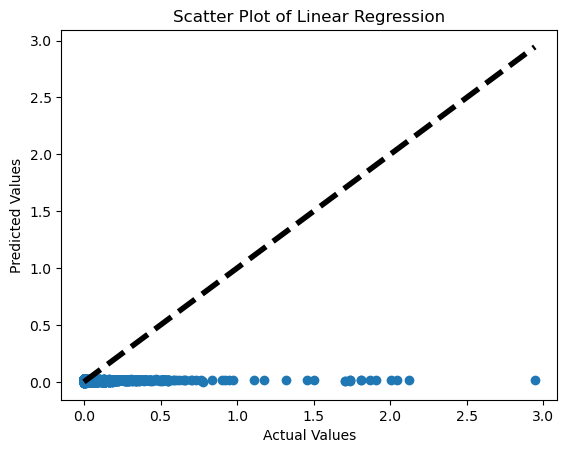

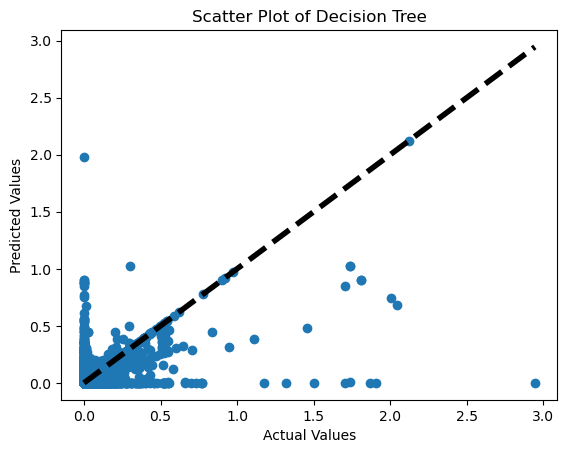

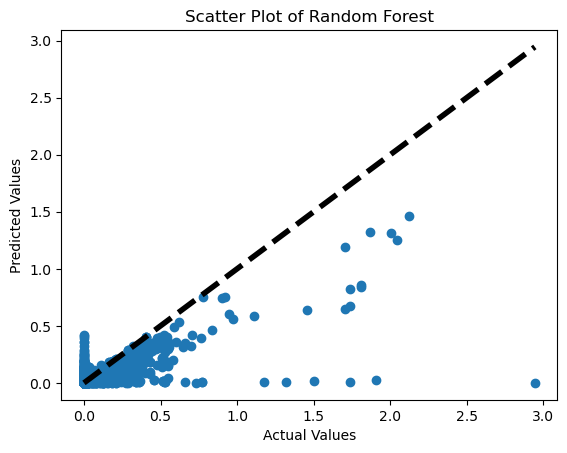

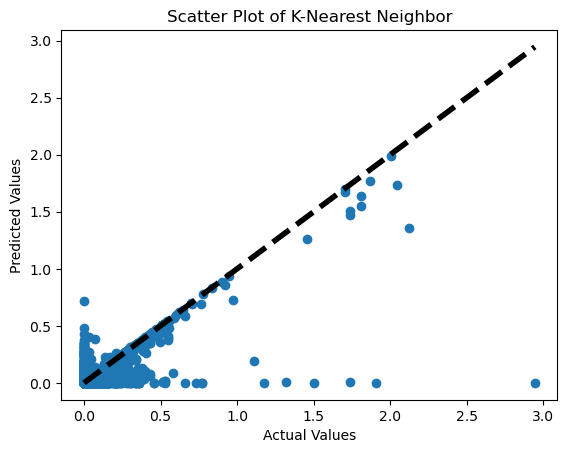

In [37]:
# model evaluation
df_ev = pd.DataFrame()
y_preds = []
for model in hp_models:
    gs = model['grid_search']
    y_pred = gs.predict(X_test)
    y_preds.append({'name': model['name'], 'y_pred': y_pred})
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    new_row = {'Model': model['name'], 'MSE': mse, 'R2': r2}
    df_ev = pd.concat([df_ev, pd.DataFrame(new_row, index=[0])], ignore_index=True)
print(df_ev)

for y in y_preds:
    y_pred = y['y_pred']
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    title = 'Scatter Plot of ' + y['name'] 
    plt.title(title)
    plt.show()

In [36]:
# selecting best model
best_model_name = ''
best_model = None
best_mse = np.inf

for model in hp_models:
    gs = model['grid_search']
    if -gs.best_score_ < best_mse:
        best_model_name = model_name
        best_model = gs.best_estimator_
        best_mse = -gs.best_score_

print(f"The best-performing model is {best_model_name} with a cross-validated MSE of {best_mse}")
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE for the best-performing model: {mse}")
print(f"R2 score for the best-performing model: {r2}")

The best-performing model is K-Nearest Neighbor with a cross-validated MSE of 0.0010703748991041752
MSE for the best-performing model: 0.0010455016261237797
R2 score for the best-performing model: 0.7540208787860912


In [37]:
# saving best model
joblib.dump(best_model, 'model.joblib')

['model.joblib']
